Importing libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import joblib

Loading Data

In [9]:
X_train = joblib.load('X_train_final.pkl')
X_test = joblib.load('X_test_final.pkl')
y_train = joblib.load('y_train_encoded.pkl')
y_test = joblib.load('y_test_encoded.pkl')

Re-training Decision Tree with Best Params

In [10]:
dt_params = {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
final_model = DecisionTreeClassifier(random_state=42, **dt_params)
final_model.fit(X_train, y_train)

y_pred_dt = final_model.predict(X_test)

if isinstance(X_test, pd.DataFrame):
    feature_names = X_test.columns.tolist()
else:
    feature_names = [f'Feature_{i}' for i in range(X_test.shape[1])]

TARGET_NAMES = ['Class 0', 'Class 1']

Model Evaluation and Visualization


--- Classification Report (Final Model: Decision Tree) ---
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       842
     Class 1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


--- Confusion Matrix ---


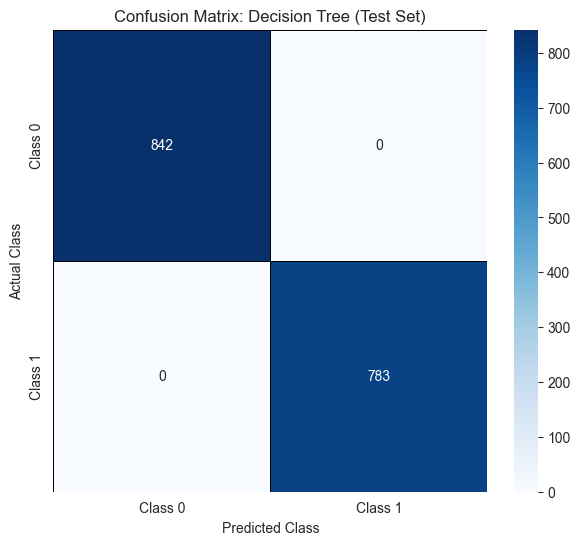

In [7]:
print("\n--- Classification Report (Final Model: Decision Tree) ---")
print(classification_report(y_test, y_pred_dt, target_names=TARGET_NAMES))

print("\n--- Confusion Matrix ---")

cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=TARGET_NAMES, yticklabels=TARGET_NAMES,
            linewidths=.5, linecolor='black')
plt.title('Confusion Matrix: Decision Tree (Test Set)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()



--- Feature Importance Plot ---


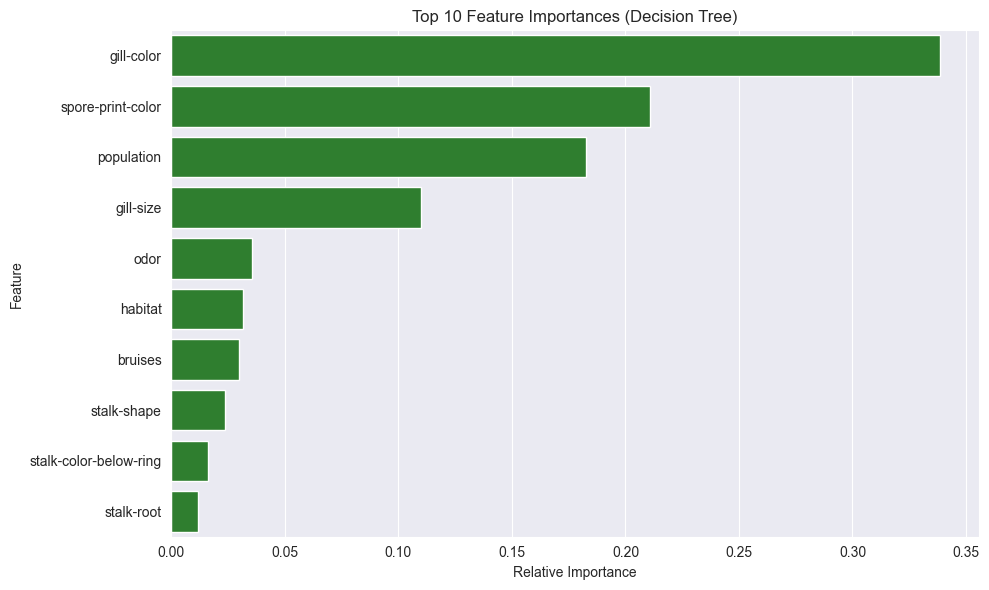

In [6]:
print("\n--- Feature Importance Plot ---")

if hasattr(final_model, 'feature_importances_'):
    importances = final_model.feature_importances_

    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), color='forestgreen')
    plt.title('Top 10 Feature Importances (Decision Tree)')
    plt.xlabel('Relative Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot generate feature importance: Model object does not support feature_importances_.")

 **1) Decision Tree (DT)**
<br><br> **STRENGTH:** It's the simplest model. Achieved 100% accuracy with clear, transparent rules. Low computing power needed.
<br> **WEAKNESS:** The perfect 100% score suggests the model might be too tuned to this data, risking failure on new, slightly different real-world data.
<br><br> **2) Random Forest (RF)**
<br><br> **STRENGTH:** As a group of trees, it's generally a very stable and dependable model that handles data noise well.
<br> **WEAKNESS:** Does not perform better than the DT, but is harder to explain and uses more computing power. We reject it because it's unnecessarily complicated.
<br><br> **3) Categorical NB**
<br><br> **STRENGTH:** Quickest model to train, making it a good starting point.
<br> **WEAKNESS:** It failed because it assumes features don't influence each other, which is not true for our data. Its performance was too low (≈96%).